In [1]:
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from th_eventreader import TH_EventReader as py_reader
from th_eventreader import MatEventReader as mat_reader
import pandas as pd
pd.set_option('display.max_columns', None)

In [11]:
import warnings
warnings.filterwarnings('error')
exp_df = py_reader.exp_df()
row = exp_df.iloc[30]
events = py_reader.get_events(**row, recalc=True)

In [12]:
row.pop('session')
mat_events = mat_reader.get_events_from_mat(**row)
mat_events = mat_events[mat_events['session']==events['original_session_ID'].iloc[0]]

/home1/shai.goldman/anaconda2/envs/pgo_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
events[['mstime', 'pathInfo', 'session', 'original_session_ID']]

,mstime,pathInfo,session,original_session_ID
0,1462380475798,"[{'mstime': 1462380465430, 'x': 384.5869, 'y':...",1,1
1,1462380481215,"[{'mstime': 1462380477299, 'x': 396.8941, 'y':...",1,1
2,1462380495963,"[{'mstime': 1462380482730, 'x': 388.4595, 'y':...",1,1
3,1462380505081,"[{'mstime': 1462380497480, 'x': 370.3786, 'y':...",1,1
4,1462380518381,[],1,1
...,...,...,...,...
203,1462383538515,"[{'mstime': 1462383530913, 'x': 381.4359, 'y':...",1,1
204,1462383551880,"[{'mstime': 1462383540015, 'x': 406.1329, 'y':...",1,1
205,1462383562896,[],1,1
206,1462383572997,[],1,1


In [14]:
mat_events[['mstime', 'pathInfo', 'session']]

,mstime,pathInfo,session
191,1462380475798,"[{'mstime': 1462380465430.0, 'x': 384.5869, 'y...",1
192,1462380481215,"[{'mstime': 1462380477299.0, 'x': 396.8941, 'y...",1
193,1462380495963,"[{'mstime': 1462380482730.0, 'x': 388.4595, 'y...",1
194,1462380505081,"[{'mstime': 1462380497480.0, 'x': 370.3786, 'y...",1
195,1462380518381,"[{'mstime': 1462380482730.0, 'x': 388.4595, 'y...",1
...,...,...,...
394,1462383538515,"[{'mstime': 1462383530913.0, 'x': 381.4359, 'y...",1
395,1462383551880,"[{'mstime': 1462383540015.0, 'x': 406.1329, 'y...",1
396,1462383562896,"[{'mstime': 1462383540015.0, 'x': 406.1329, 'y...",1
397,1462383572997,"[{'mstime': 1462383525247.0, 'x': 372.9505, 'y...",1


In [15]:
#event 0 is seomtimes SESS_START event which doesnt show up in pyhton
mat_events = mat_events[mat_events['type']!='SESS_START'] 
mat_events.index = range(len(mat_events))

In [16]:
py_path = events['pathInfo']
mat_path = mat_events['pathInfo']

In [17]:
start = 50

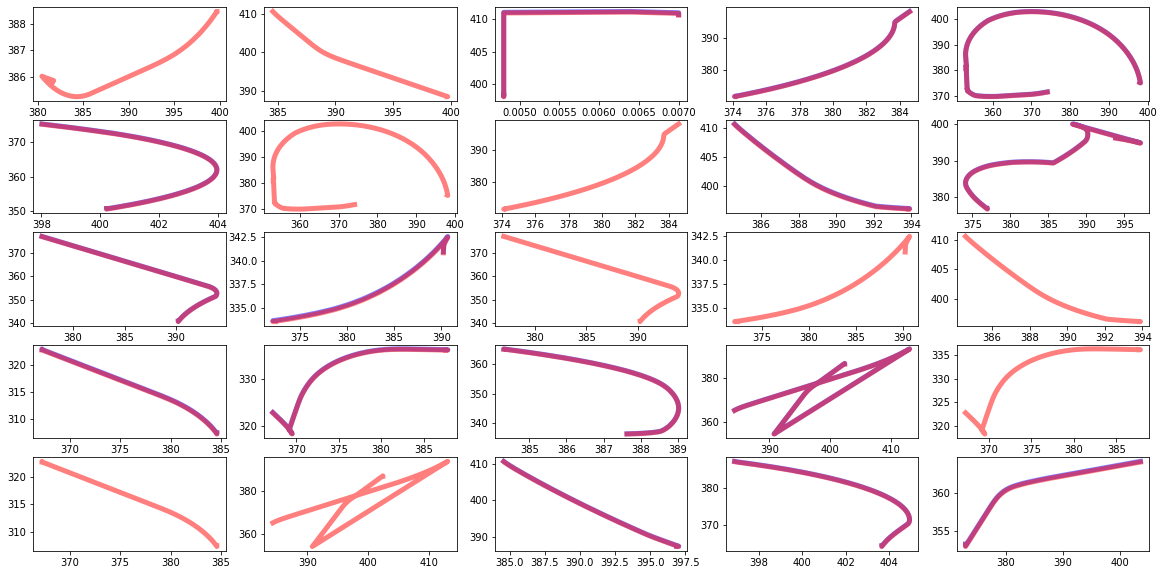

In [18]:
fig, axes = plt.subplots(5, 5, figsize=(20, 10))
for i in range(25):
    pp = py_path.iloc[i+start]
    mp = mat_path.iloc[i+start]
    axes[int(i/5), i%5].plot(
        [p['x'] for p in pp], [p['y']+.1 for p in pp], 
        linewidth=5, color='blue', alpha=.5)
    axes[int(i/5), i%5].plot(
        [p['x'] for p in mp], [p['y'] for p in mp], 
        linewidth=5, color='red', alpha=.5)

In [19]:
subj = 'R1171M'
montage = 0
session = 0
events = py_reader.get_events(subj, montage, session, 'TH1', recalc=True)


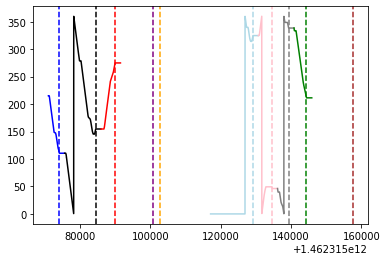

In [20]:
colors=('blue', 'black', 'red', 'purple', 'orange', 'lightblue',
        'pink', 'grey', 'green', 'brown')
colors = (i for i in colors)

for i in range(60, 70):
    color = next(colors)
    plt.plot([t['mstime'] for t in events.loc[i]['pathInfo']],
             [t['heading'] for t in events.loc[i]['pathInfo']], 
             label=i, color=color)
    plt.axvline(events.loc[i]['mstime'], linestyle='--', label=i, color=color)

#plt.legend()